In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

/home/daniellygj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if sys.path[0] == '':


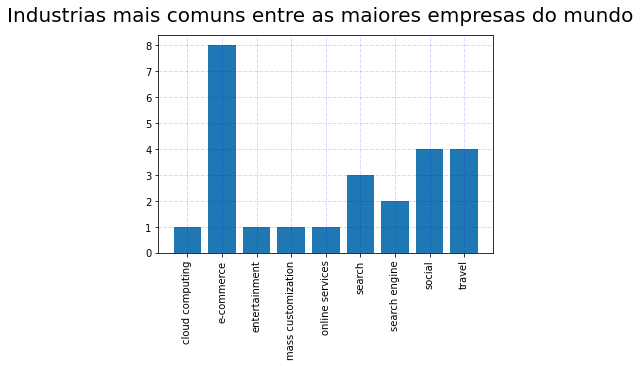

In [46]:
html = urlopen('http://www.worldatlas.com/articles/the-25-largest-internet-companies-in-the-world.html')
soup = BeautifulSoup(html.read(), 'html.parser')
body = soup.tbody
lines = body.findAll('tr')

sectors = []

for line in lines:
    setor = line.findAll('td')[2].text.lower()
    sectors.append(setor)
    
frequency_table = stats.itemfreq(sectors) 

x = frequency_table[:, 1].astype(int)
y = frequency_table[:, 0]

fig = plt.figure(1)
fig.suptitle('Ramos mais comuns entre as maiores empresas do mundo', fontsize=20)
plt.xticks(np.arange(len(y)), y, rotation='vertical')
x_pos = np.arange(len(y))
plt.bar(x_pos, x, align='center')
plt.grid(b=True, color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
